## 5.18.1 Lasso path using LARS

Computes Lasso Path along the regularization parameter using the LARS algorithm on the diabetes dataset. Each color represents a different feature of the coefﬁcient vector, and this is displayed as a function of the regularization parameter.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes() 
X = diabetes.data 
y = diabetes.target
print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
print(coefs.shape)
xx = np.sum(np.abs(coefs.T), axis=1)
print(xx.shape)
xx /= xx[-1]
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim() 
plt.vlines(xx, ymin, ymax, linestyle='dashed') 
plt.xlabel('|coef| / max|coef|') 
plt.ylabel('Coefficients') 
plt.title('LASSO Path') 
plt.axis('tight') 
plt.show()

## 5.18.2 Plot Ridge coefﬁcients as a function of the regularization

Shows the effect of collinearity in the coefﬁcients of an estimator. 

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefﬁcient vector, and this is displayed as a function of the regularization parameter. 

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise). 

When alpha is very large, the regularization effect dominates the squared loss function and the coefﬁcients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefﬁcients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1./(np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
ridge = linear_model.Ridge(fit_intercept=False)
for a in alphas:
    ridge.alpha = a
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization') 
plt.axis('tight')
plt.show()

## 5.18.13 Linear Regression Example

This example uses the only the ﬁrst feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. 

The coefﬁcients, the residual sum of squares and the variance score are also calculated.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:,np.newaxis,2]
print(diabetes_X.shape)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object 
regr = linear_model.LinearRegression()

# Train the mdoel
regr.fit(diabetes_X_train, diabetes_y_train)

# Make prediction using the test set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficient
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: {:.2f}".format(
                mean_squared_error(diabetes_y_test,diabetes_y_pred)))

# Explained variance score: 1 is perfect prediction
print("Variance score: {:.2f}".format(
                r2_score(diabetes_y_test,diabetes_y_pred)))

# Plot output
plt.figure(figsize=(10,6))
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## 5.18.18 Joint feature selection with multi-task Lasso

The multi-task lasso allows to ﬁt multiple regression problems jointly enforcing the selected features to be the same across tasks. This example simulates sequential measurements, each task is a time instant, and the relevant features vary in amplitude over time while being the same. The multi-task lasso imposes that features that are selected at one time point are select for all time point. This makes feature selection by the Lasso more stable.



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and 
# phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks,n_features))
times = np.linspace(0, 2*np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:,k] = np.sin((1. + rng.randn(1)) * times + 3*rng.randn(1))
X = rng.randn(n_samples,n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)
coef_lasso_ = np.array([Lasso(alpha=.5).fit(X,y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X,Y).coef_

# Plot support and time series 
fig = plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or task)')
plt.text(10,5,'Lasso')
plt.subplot(1,2,2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')
fig.show()

feature_to_plot = 0
plt.figure() 
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth') 
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw, 
         label='MultiTaskLasso') 
plt.legend(loc='lower left') 
plt.axis('tight') 
plt.ylim([-1.1, 1.1]) 
plt.show()


## 5.18.20 Orthogonal Matching Pursuit

Using orthogonal matching pursuit for recovering as parse signal from a noisy measurement encoded with a dictionary

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit, \
                                 OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# Generate data
y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)
idx, = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.xlim(0,512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,2)
plt.xlim(0,512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction
omp.fit(X,y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,3)
plt.xlim(0,512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])
          
# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV(cv=5)
omp_cv.fit(X, y_noisy) 
coef = omp_cv.coef_
idx_r, = coef.nonzero() 
plt.subplot(4, 1, 4) 
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV") 
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

## 5.18.23 Lasso and Elastic Net for Sparse Signals

Estimates Lasso and Elastic-Net regression models on a manually generated sparse signal corrupted with an additive noise. Estimated coefﬁcients are compared with the ground-truth.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score

# Generate some sparse data to play with 
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples,n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1)** idx * np.exp(-idx/10)
coef[10:] = 0 # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0],
                   enet.coef_[enet.coef_ != 0],
                   markerfmt='x',
                   label='Elastic net coefficients')
plt.setp([m, s], color='#2ca02c')
m, s, _ = plt.stem(np.where(lasso.coef_)[0],
                   lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x',
                   label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0],
         coef[coef != 0],
         markerfmt='bx',
         label='True coefficients')
plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" 
          % (r2_score_lasso, r2_score_enet))
plt.show()

## 5.18.28 Lasso and Elastic Net
Lasso and elastic net (L1 and L2 penalisation) implemented using a coordinate descent. The coefﬁcients can be forced to be positive.


In [ ]:
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes() 
X = diabetes.data 
y = diabetes.target
X /= X.std(axis=0) # Standardize data (easier to set the l1_ratio parameter)
print(X.shape)
# Compute paths
eps = 5e-3 # the smaller it is the longer is the path
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
print("Computing regularization path using the positive lasso...") 
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path( 
    X, y, eps, positive=True, fit_intercept=False) 
print("Computing regularization path using the elastic net...") 
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
print("Computing regularization path using the positive elastic net...") 
alphas_positive_enet, coefs_positive_enet, _ = enet_path( 
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results
plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c) 
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left') 
plt.axis('tight')
plt.show()

plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left') 
plt.axis('tight')
plt.show()

plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c) 
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),  loc='lower left') 
plt.axis('tight')
plt.show()


## 5.18.30 Bayesian Ridge Regression

Computes a Bayesian Ridge Regression on a synthetic dataset. 

See Bayesian Ridge Regression for more information on the regressor. 

Compared to the OLS (ordinary least squares) estimator, the coefﬁcient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian. 

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations. 

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.


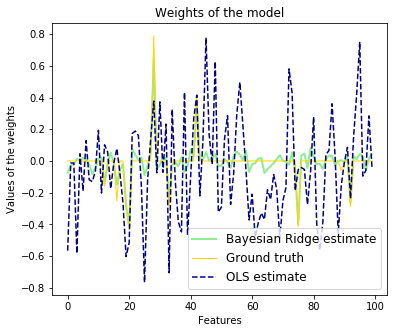

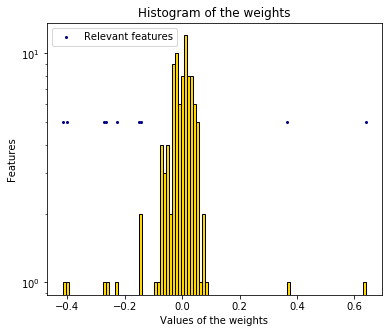

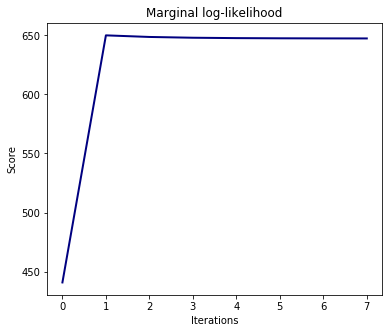

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression

# Generated simulated data with Gaussian data
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features) # Create Gaussian data 
# Create weights with a precision lambda_ of 4.
lambda_ = 4. 
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1./np.sqrt(lambda_))
# Create noise with a precision alpha of 50. 
alpha_ = 50. 
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples) 
# Create the target
y = np.dot(X, w) + noise

# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True) 
clf.fit(X, y)
ols = LinearRegression() 
ols.fit(X, y)

# Plot true weights, estimated weights, histogram of the weights, and 
# predictions with standard deviations
lw = 2 
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw, 
         label="Bayesian Ridge estimate") 
plt.plot(w, color='gold', linewidth=1, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate") 
plt.xlabel("Features") 
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show()

plt.figure(figsize=(6, 5)) 
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black') 
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features",s=4) 
plt.ylabel("Features")
plt.xlabel("Values of the weights") 
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(6, 5)) 
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw) 
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

## 5.18.31 Lasso model selection: Cross-Validation / AIC / BIC
Use the Akaike information criterion (AIC), the Bayes Information criterion (BIC) and cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator. 

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based model selection is very fast, but it relies on a proper estimation of degrees of freedom, are derived for large samples (asymptotic results) and assume the model is correct,i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

For cross-validation, we use 20-fold with 2 algorithms to compute the Lassopath: coordinate descent,a simple mented by the LassoCV class, and Lars (least angle regression) as implemented by the LassoLarsCV class. Both algorithms give roughly the same results. They differ with regards to their execution speed and sources of numerical errors.

Lars computes a path solution only for each kink in the path. As a result,it is very efﬁcient when there are only of few kinks, which is the case if there are few features or samples. Also, it is able to compute the full path without setting any meta parameter. On the opposite, coordinate descent compute the path points on a pre-speciﬁed grid (here we use thedefault). Thus it is more efﬁcient if the number of grid points is smaller than the number of kinks in the path. Such a strategy can be interesting if the number of features is really large and there are enough samples to select a large amount. In terms of numerical errors, for heavily correlated variables, Lars will accumulate more errors, while the coordinate descent algorithm will only sample the path on a grid. 

Note how the optimal value of alpha varies for each fold. This illustrates why nested-cross validation is necessary when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for unseen data.


In [ ]:
import time 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0],14)] # add some bad features

# normalize data as done by Lars to allow for comparasion
X /= np.sqrt(np.sum(X**2, axis=0))

# LassoLarsIC: least angle regression with BIC/AIC criterion
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X,y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X,y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='{} criterion'.format(name))
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: {} estimate'.format(name))
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.tight_layout()
plt.show()

# LassoCV: coordinate descent

# Compute path
print('Computing regularization path using the coordinate descent lasso...')
t1 = time.time()
model = LassoCV(cv=20).fit(X,y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_,':')
# print(model.mse_path_.shape)
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1),'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('-log(alpha)') 
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv) 
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()

# LassoLarsCV: least angle regression
print("Computing regularization path using the Lars lasso...") 
t1 = time.time() 
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_,':')
# print(model.mse_path_.shape)
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1),'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)') 
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars '
          '(train time: %.2fs)' % t_lasso_lars_cv) 
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()